Fraud Detection System Using Machine Learning

In [8]:
# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset
Fraud_D = pd.read_csv(r'C:\\Users\\KIIT\\.vscode\\Mini Project\\dataset.csv')

In [9]:
# Rename the column header
Fraud_D.columns= ["step", "type", "amount", "customer_starting_transaction", "bal_before_transaction", 
            "bal_after_transaction", "recipient_of_transaction", "bal_of_recipient_before_transaction", "bal_of_recipient_after_transaction", "fraud_transaction"]

# View data (to give you first five rows)
Fraud_D.head()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recipient_before_transaction,bal_of_recipient_after_transaction,fraud_transaction
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [10]:
# View data (to give you last five rows)
Fraud_D.tail()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recipient_before_transaction,bal_of_recipient_after_transaction,fraud_transaction
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [11]:
# Data Verification
Fraud_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   step                                 1048575 non-null  int64  
 1   type                                 1048575 non-null  object 
 2   amount                               1048575 non-null  float64
 3   customer_starting_transaction        1048575 non-null  object 
 4   bal_before_transaction               1048575 non-null  float64
 5   bal_after_transaction                1048575 non-null  float64
 6   recipient_of_transaction             1048575 non-null  object 
 7   bal_of_recipient_before_transaction  1048575 non-null  float64
 8   bal_of_recipient_after_transaction   1048575 non-null  float64
 9   fraud_transaction                    1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [12]:
# Statistical analysis of the data
Fraud_D.describe()

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recipient_before_transaction,bal_of_recipient_after_transaction,fraud_transaction
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740055e+05,8.938049e+05,9.781600e+05,1.114193e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971725e+06,3.008246e+06,2.296779e+06,2.416554e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.893942e+07,3.894623e+07,4.205466e+07,4.216916e+07,1.000000e+00


In [13]:
Fraud_D.describe().astype(int)

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recipient_before_transaction,bal_of_recipient_after_transaction,fraud_transaction
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874005,893804,978159,1114193,0
std,15,264940,2971725,3008245,2296779,2416554,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38939424,38946233,42054659,42169156,1


In [14]:
# Missing values
Fraud_D.isnull()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recipient_before_transaction,bal_of_recipient_after_transaction,fraud_transaction
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False


In [15]:
Fraud_D.isnull().sum()

step                                   0
type                                   0
amount                                 0
customer_starting_transaction          0
bal_before_transaction                 0
bal_after_transaction                  0
recipient_of_transaction               0
bal_of_recipient_before_transaction    0
bal_of_recipient_after_transaction     0
fraud_transaction                      0
dtype: int64

<Axes: title={'center': 'missing data visualization in the dataset'}>

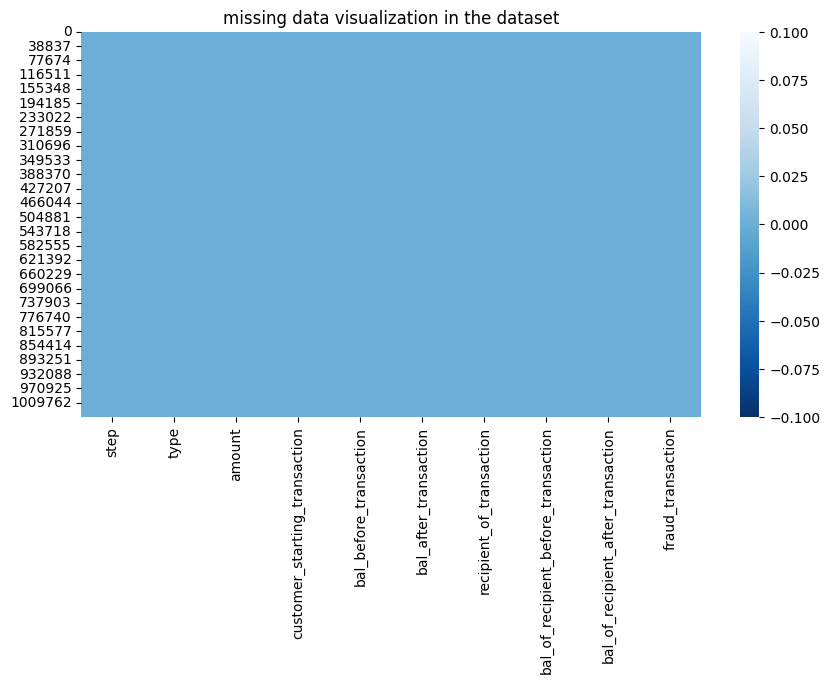

In [16]:
# To visualize the missing values
plt.figure(figsize = (10,5))
plt.title ("missing data visualization in the dataset")
sns.heatmap(Fraud_D.isnull(), cbar =True, cmap= "Blues_r")

There is no missing values in the dataset.

In [14]:
#check shape of the entire dataframe using .shape attribute
Fraud_D.shape

(1048575, 10)

We have 1,048,575 rows and 10 columns in the dataset.

EXPLORATORY DATA ANALYSIS

- Univariate Analysis
- Bi-variate Analysis
- Multivariate Analysis
- Correlation

Text(0, 0.5, 'count of online transaction type ')

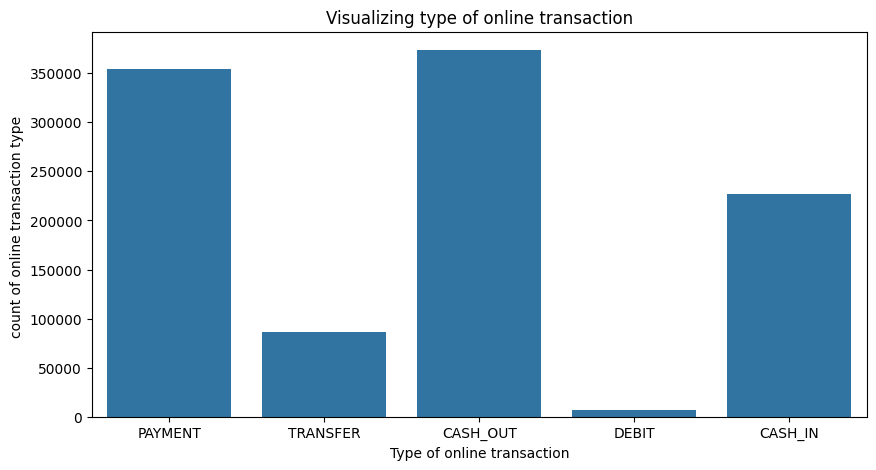

In [ ]:
# Univariate Analysis

#visualize type of online transaction
plt.figure(figsize=(10,5))
sns.countplot (x="type", data= Fraud_D)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

From the chart, it is seen that cash_out and payment is the most common type of online transaction that customers use.

<Axes: title={'center': 'Fraudulent Transactions'}, ylabel='count'>

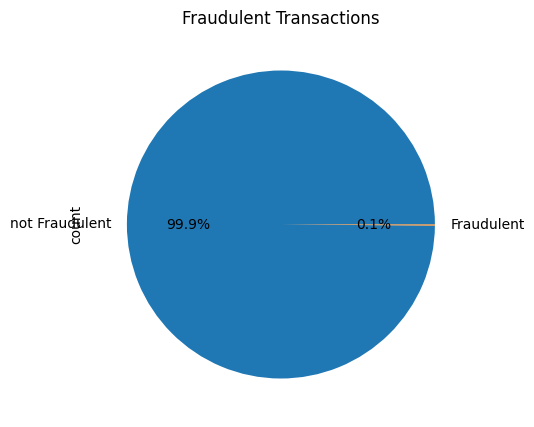

In [16]:
# create a function that properly labels isFraud
def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "not Fraudulent"
    
# create a new column
Fraud_D["fraud_transaction_label"] = Fraud_D["fraud_transaction"].apply(Fraud)

# create visualization
plt.figure(figsize = (10,5))
plt.title ("Fraudulent Transactions")
Fraud_D.fraud_transaction_label.value_counts().plot.pie(autopct='%1.1f%%')

From this chart, its shows that most of the online transactions customers does is not fraudulent. Also the dataset is not balance.

In [17]:
Fraud_D.fraud_transaction_label.value_counts()

fraud_transaction_label
not Fraudulent    1047433
Fraudulent           1142
Name: count, dtype: int64

In [1]:
1142/1048575*100

0.10890971079798775

1,142 transactions have been tagged as fraudulent in the dataset, which is approximately 0.1% of the total number of transactions.

<Axes: xlabel='step', ylabel='Density'>

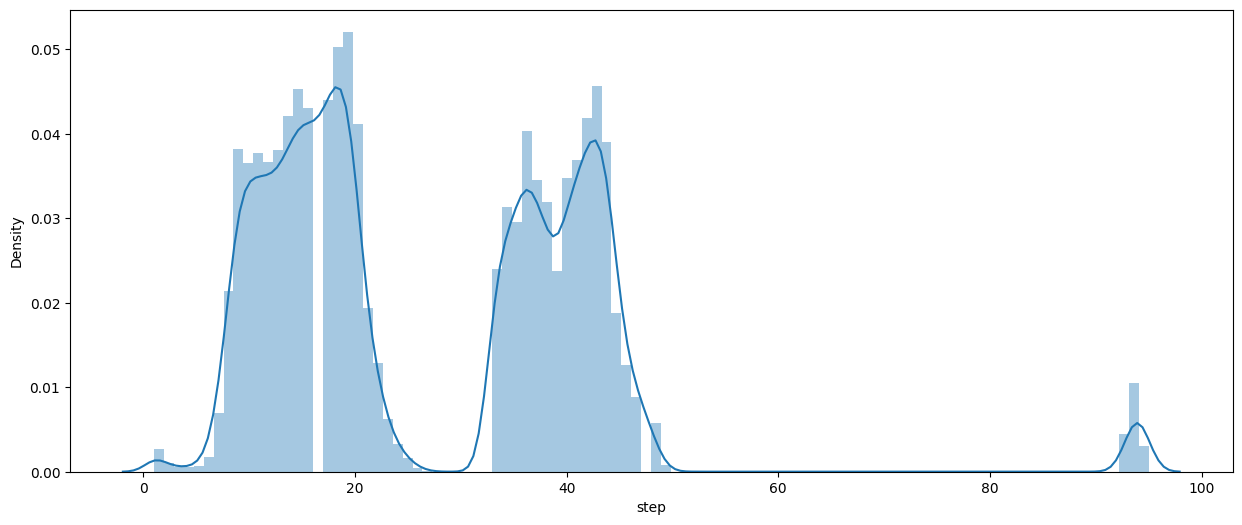

In [ ]:
#To disable warnings
import warnings
warnings.filterwarnings("ignore")

# Visualization for step column
plt.figure(figsize=(15,6))
sns.distplot(Fraud_D['step'],bins=100)

The above graph indicates the distribution of the step column.

<Axes: xlabel='amount', ylabel='Count'>

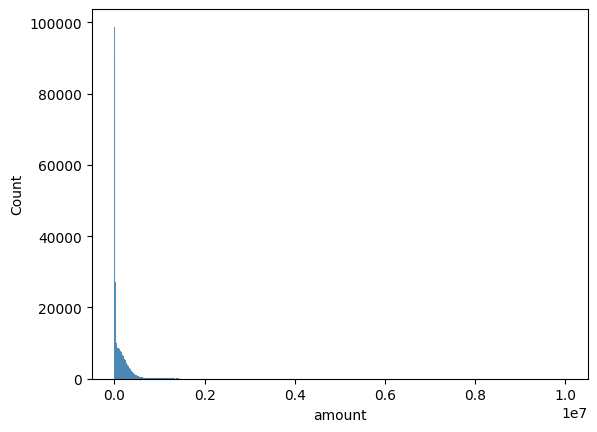

In [20]:
# Visualization for amount column
sns.histplot(x= "amount", data =Fraud_D)

In [21]:
Fraud_D.head()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recipient_before_transaction,bal_of_recipient_after_transaction,fraud_transaction,fraud_transaction_label
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,not Fraudulent
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,not Fraudulent
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraudulent
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraudulent
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,not Fraudulent


In [22]:
Fraud_D.tail()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recipient_before_transaction,bal_of_recipient_after_transaction,fraud_transaction,fraud_transaction_label
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,not Fraudulent
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,not Fraudulent
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,not Fraudulent
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,not Fraudulent
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,not Fraudulent


<Axes: xlabel='type', ylabel='amount'>

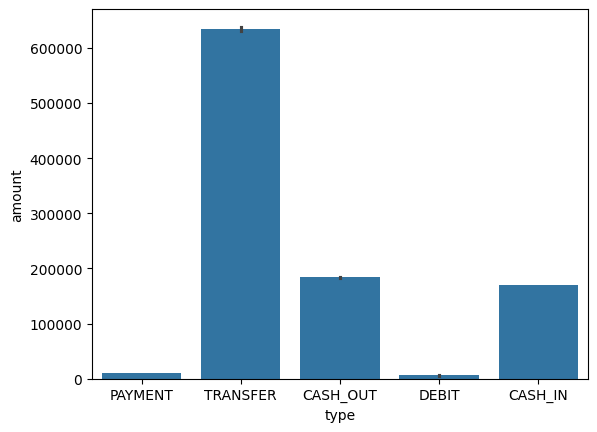

In [ ]:
# Bi-variate Analysis

sns.barplot(x='type',y='amount',data=Fraud_D)

In this chart, 'transfer' type has the maximum amount of money being transferred from customers to the recipient. Although 'cash out' and 'payment' are the most common type of transactions.

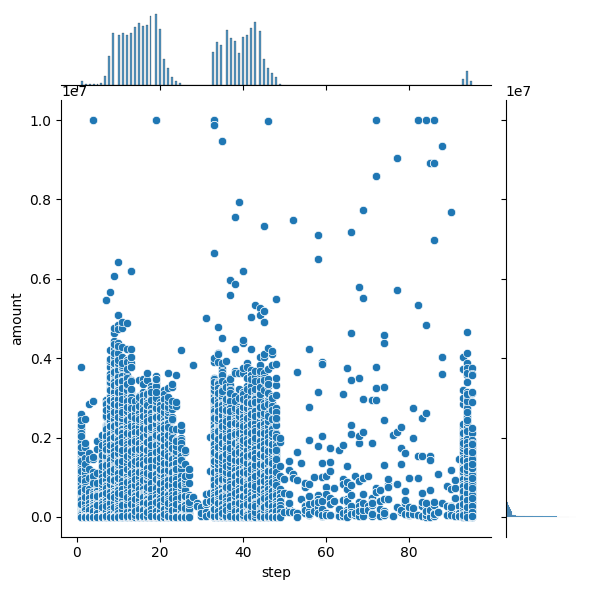

In [24]:
# Visualization between step and amount
sns.jointplot(x='step',y='amount',data=Fraud_D)

<Axes: xlabel='amount', ylabel='step'>

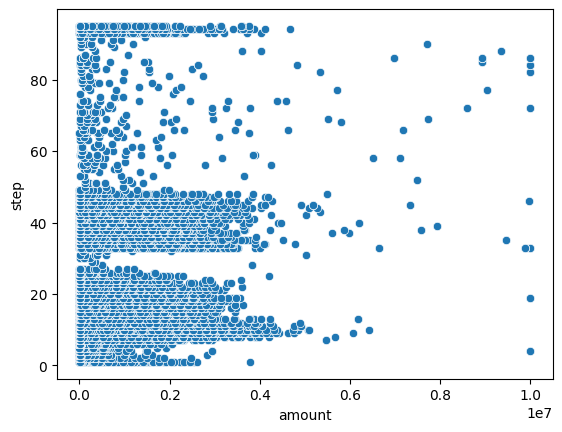

In [25]:
sns.scatterplot(x=Fraud_D["amount"], y=Fraud_D["step"])

Text(0, 0.5, 'fraud_transaction_label')

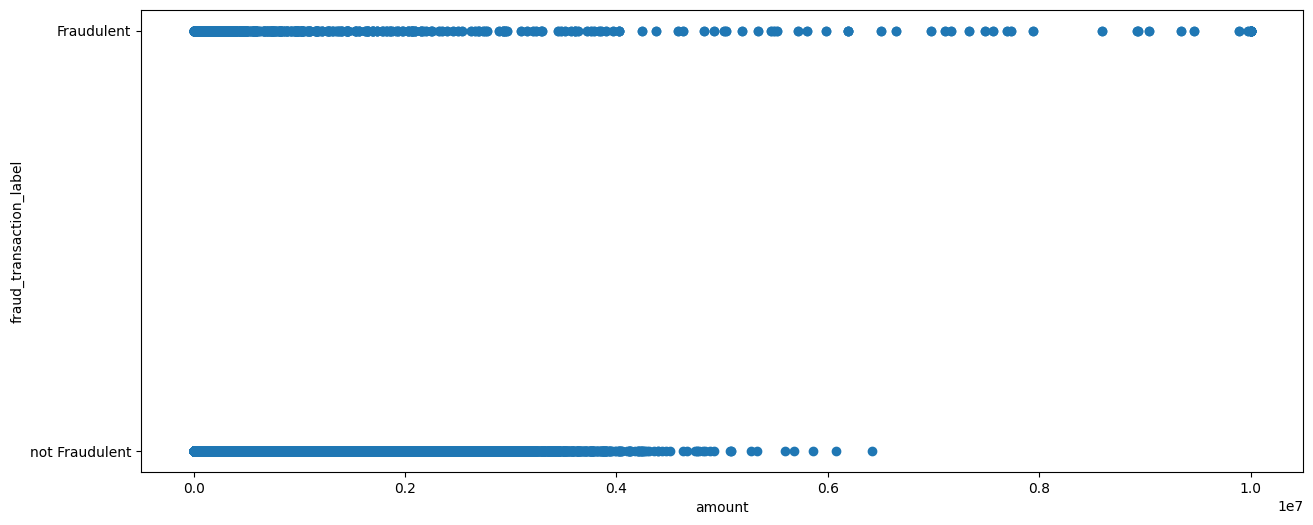

In [26]:
# Visualization between amount and fraud_transaction_label
plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='fraud_transaction_label',data=Fraud_D)
plt.xlabel('amount')
plt.ylabel('fraud_transaction_label')

Although the amount of fraudulent transactions is very low, majority of them are constituted within 0 and 10,000,000 amount.

Text(0, 0.5, 'fraud_transaction_label')

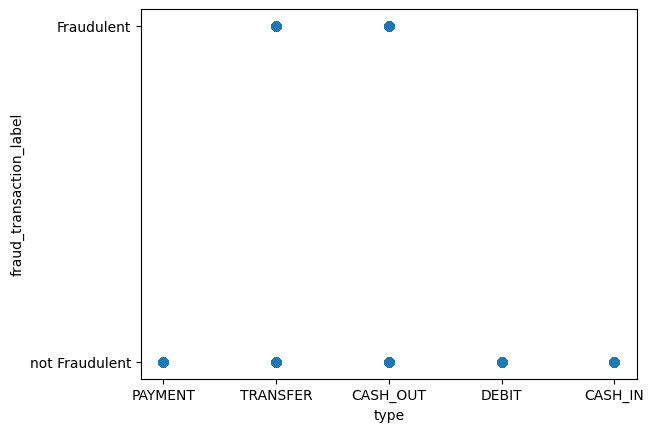

In [27]:
# Visualization between type and isfraud_label
plt.scatter(x='type',y='fraud_transaction_label',data=Fraud_D)
plt.xlabel('type')
plt.ylabel('fraud_transaction_label')

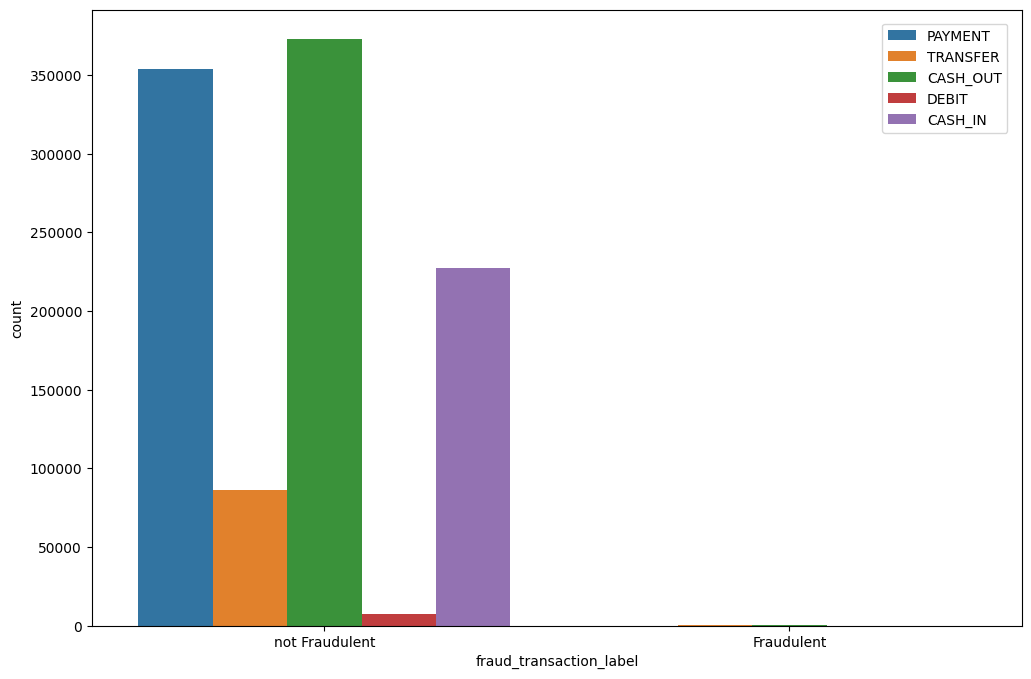

In [28]:
# Visualization between type and isfraud_label
plt.figure(figsize=(12,8))
sns.countplot(x='fraud_transaction_label',data=Fraud_D,hue='type')
plt.legend(loc=[0.85,0.8])

Both the above graphs indicate that transactions of the type 'transfer' and 'cash out' comprise fraudulent transactions.

<Axes: xlabel='type', ylabel='step'>

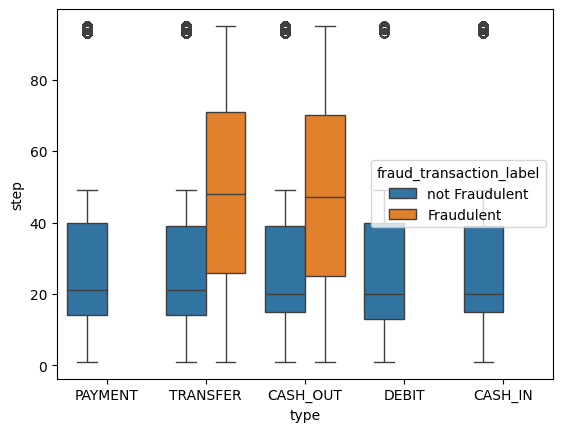

In [29]:
# Multivariate Analysis

# Visualizing btw step,type and isFraud_label
sns.boxplot(x= "type", y= "step", hue ="fraud_transaction_label", data= Fraud_D)

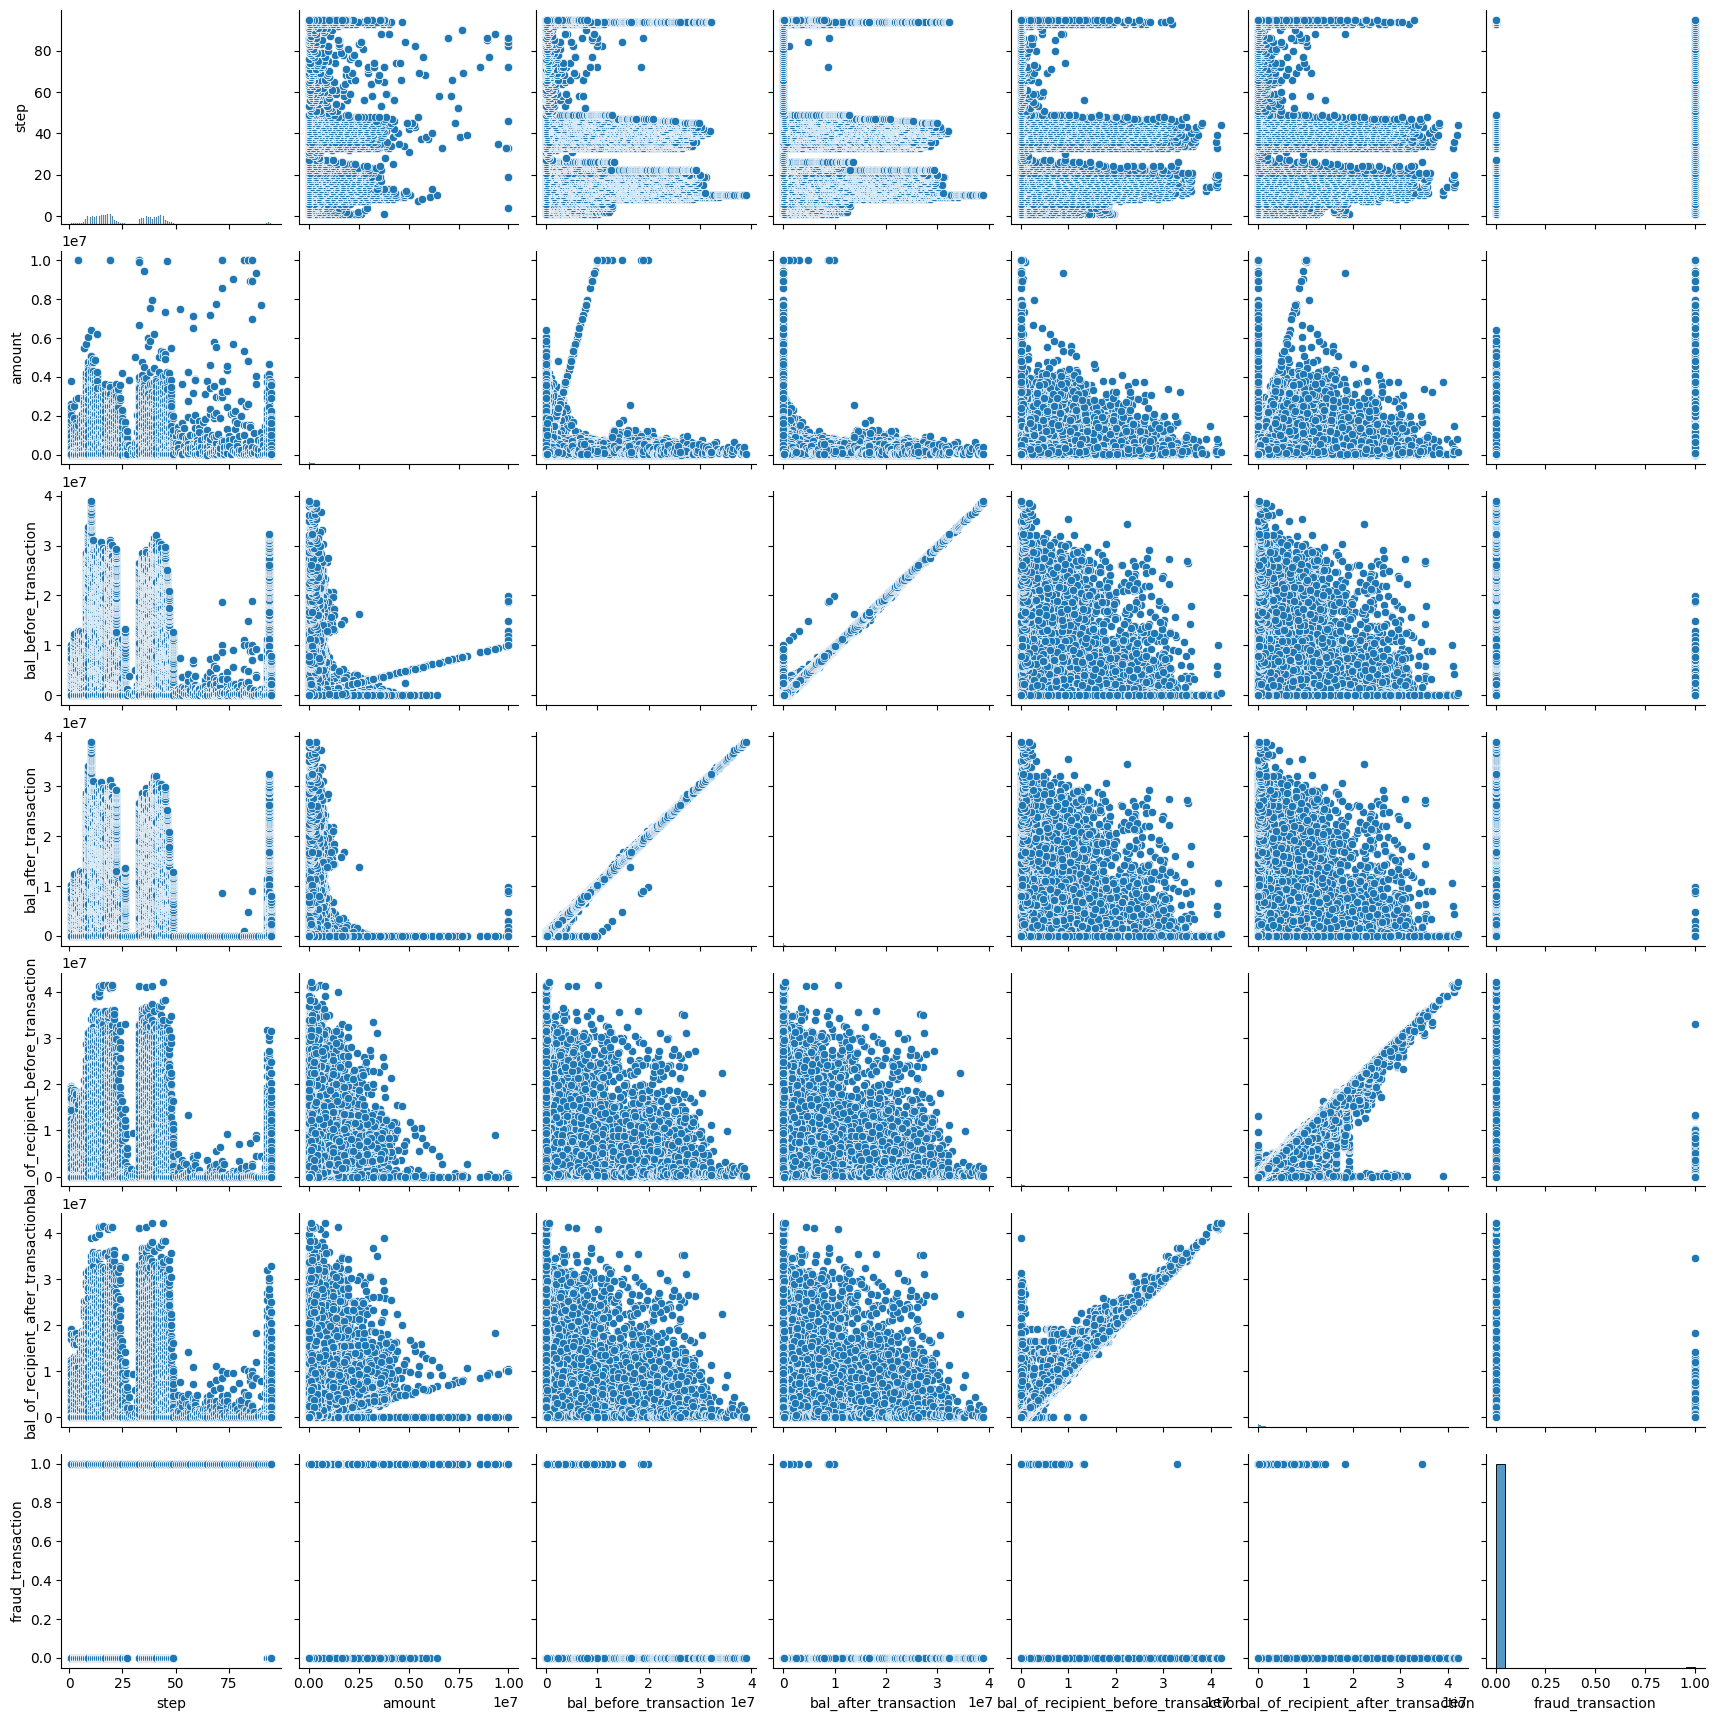

In [17]:
sns.pairplot(Fraud_D)

<Axes: >

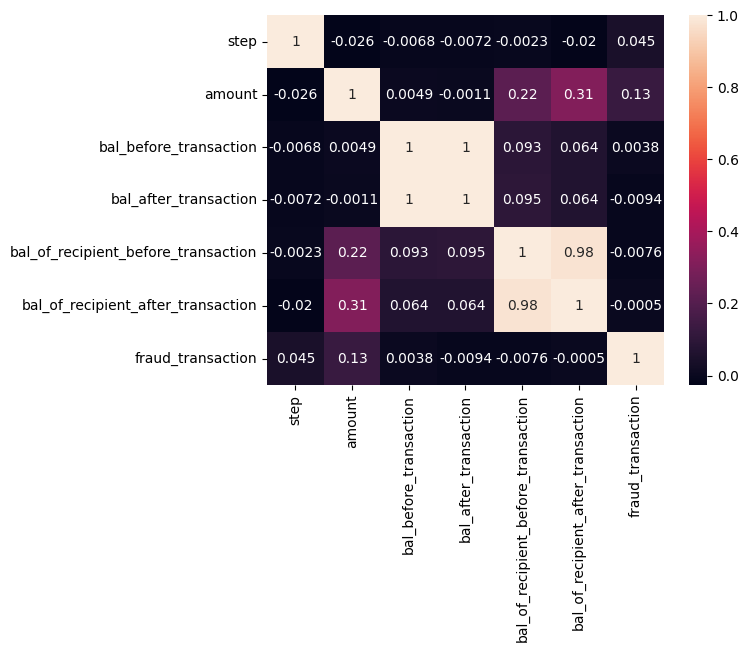

In [ ]:
# Correlation

# Step 1: Select only numeric columns
corel = Fraud_D.select_dtypes(include=['number']).corr()

# Step 2: Plot the heatmap
sns.heatmap(corel, annot=True)

PERFORMING FEATURE ENGINERRING

-Encoding categorical variables

In [ ]:
# One Hot Encoding
#1. select categorical variables
categorical = ['type']

In [40]:
#2. use pd.get_dummies() for one hot encoding
#replace pass with your code
categories_dummies = pd.get_dummies(Fraud_D[categorical])

#view what you have done
categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False


In [41]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both data and categories_dummies as a list of their names
#pop out documentation for pd.concat() to clarify
Fraud_D = pd.concat([Fraud_D,categories_dummies], axis=1)

#check what you have done
print(Fraud_D.shape)
Fraud_D.head()

(1048575, 16)


,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recipient_before_transaction,bal_of_recipient_after_transaction,fraud_transaction,fraud_transaction_label,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,not Fraudulent,False,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,not Fraudulent,False,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraudulent,False,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraudulent,False,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,not Fraudulent,False,False,False,True,False


In [42]:
#remove the initial categorical columns now that we have encoded them
#use the list called categorical to delete all the initially selected columns at once

Fraud_D.drop(categorical, axis = 1, inplace = True)

Fraud_D.drop(columns=['fraud_transaction_label', 'customer_starting_transaction', 'recipient_of_transaction'], inplace=True)

In [43]:
Fraud_D.head()

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recipient_before_transaction,bal_of_recipient_after_transaction,fraud_transaction,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False


Model Selection, Training and Validation

Select Target

In [44]:
y = Fraud_D.fraud_transaction

Selecting Features

In [45]:
X = Fraud_D.drop(['fraud_transaction'], axis = 1)

In [46]:
X

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recipient_before_transaction,bal_of_recipient_after_transaction,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,False,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,False,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,False,True,False,False,False
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,False,False,False,True,False
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,False,False,False,True,False
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,False,False,False,True,False


Import ML algorithms and initialize them


For LogisticRegression, Accuracy Score: 0.9387

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2307
           1       0.78      0.35      0.49       206

    accuracy                           0.94      2513
   macro avg       0.86      0.67      0.73      2513
weighted avg       0.93      0.94      0.93      2513



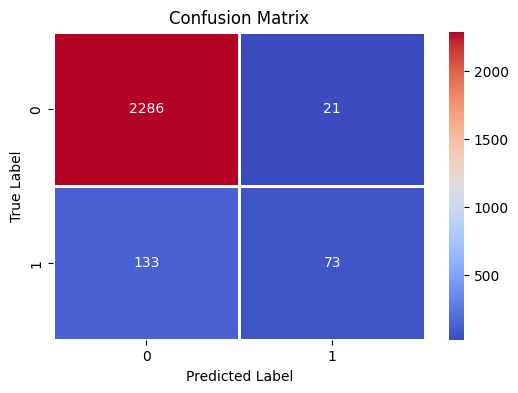


For KNeighborsClassifier, Accuracy Score: 0.9248

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2307
           1       0.56      0.37      0.45       206

    accuracy                           0.92      2513
   macro avg       0.75      0.67      0.70      2513
weighted avg       0.91      0.92      0.92      2513



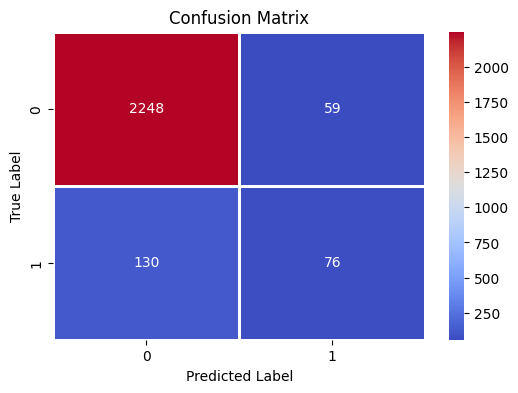


For DecisionTreeClassifier, Accuracy Score: 0.9670

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2307
           1       0.92      0.65      0.76       206

    accuracy                           0.97      2513
   macro avg       0.95      0.82      0.87      2513
weighted avg       0.97      0.97      0.96      2513



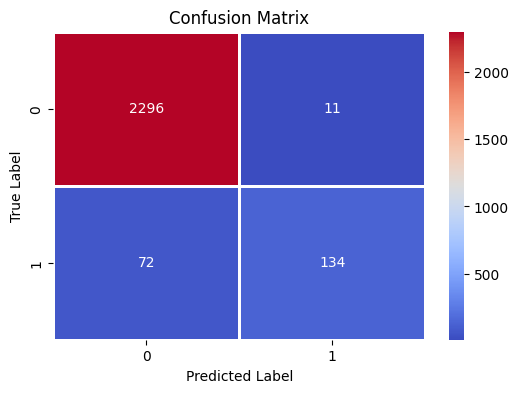


For RandomForestClassifier, Accuracy Score: 0.9662

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2307
           1       0.90      0.66      0.76       206

    accuracy                           0.97      2513
   macro avg       0.94      0.83      0.87      2513
weighted avg       0.96      0.97      0.96      2513



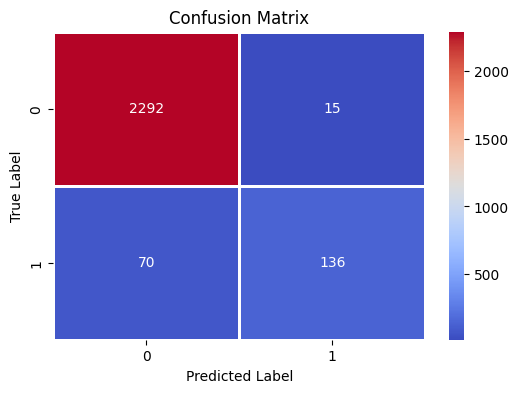

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Load dataset
df = pd.read_csv("dataset.csv")  

# Define target variable
target_column = "isFraud"

# Drop high-cardinality and leakage columns
df.drop(["nameOrig", "nameDest", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"], axis=1, inplace=True)

# Convert categorical column 'type' using Label Encoding
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])

# Convert data types to reduce memory usage
for col in df.columns:
    if df[col].dtype == "float64":
        df[col] = df[col].astype("float32")
    elif df[col].dtype == "int64":
        df[col] = df[col].astype("int32")

# Define features (X) and target (y)
X = df.drop(target_column, axis=1)  
y = df[target_column]

# Balance dataset using undersampling
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)  # 10% fraud cases
X, y = rus.fit_resample(X, y)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models with tuned hyperparameters
LR = LogisticRegression(random_state=42, max_iter=500, C=0.8)
KN = KNeighborsClassifier(n_neighbors=5)
DC = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_split=20)
RF = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=10)

# Create list of models
models = [LR, KN, DC, RF]

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, prediction):
    cm_ = confusion_matrix(y_test, prediction)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_, cmap='coolwarm', linecolor='white', linewidths=1, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Function to train model and evaluate accuracy
def trainer(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)  # Train model
    prediction = model.predict(X_test)  # Predict on test data
    # Print evaluation metrics
    acc = accuracy_score(y_test, prediction)
    print(f'\nFor {model.__class__.__name__}, Accuracy Score: {acc:.4f}\n')
    print(classification_report(y_test, prediction))
    plot_confusion_matrix(y_test, prediction)

# Loop through each model and train
for model in models:
    trainer(model, X_train, y_train, X_test, y_test)


Interpretation of the Results

The results provide accuracy, precision, recall, and F1-score for four classification models used for fraud detection. Let's analyze their performance in detail.

1) Accuracy Analysis

  Accuracy measures overall correctness, but since fraud cases are rare, it is not the best metric to evaluate fraud detection.
  All models have accuracy between 92% and 97%, which is a good range but does not guarantee good fraud detection.
  Decision Tree and Random Forest have the highest accuracy (~96.7%), while Logistic Regression and KNN are slightly lower (~93-92%).
  Issue with Accuracy → A high accuracy does not mean the model is good at detecting fraud. We need to check precision and recall for fraud cases.

2) Fraud Detection Performance (Class 1: Fraudulent Transactions)

Fraud detection is evaluated using Precision, Recall, and F1-score for Class 1 (fraud cases).

| Model               | Accuracy | Precision (Fraud) | Recall (Fraud) | F1-score (Fraud) |
|---------------------|----------|-------------------|----------------|------------------|
| Logistic Regression |  93.87%  |        78%        |       35%      |        49%       |
| KNN                 |  92.48%  |        56%        |       37%      |        45%       |
| Decision Tree       |  96.70%  |        92%        |       65%      |        76%       |
| Random Forest       |  96.62%  |        90%        |       66%      |        76%       |

🔹 Precision (Fraud) → How reliable are fraud predictions?

  High precision means that when the model predicts fraud, it is correct most of the time.
  Random Forest (90%) and Decision Tree (92%) have the highest precision.
  KNN (56%) has the lowest precision, meaning it is making many false fraud predictions.

🔹 Recall (Fraud) → How many actual fraud cases are detected?

  High recall means fewer fraud cases are missed.
  Logistic Regression (35%) and KNN (37%) have very low recall, meaning they miss most fraud cases (many false negatives).
  Decision Tree (65%) and Random Forest (66%) perform much better, meaning they catch more fraud cases.

🔹 F1-Score (Fraud) → Overall fraud detection balance

  Decision Tree and Random Forest have the best F1-scores (~76%), meaning they balance precision and recall well for fraud cases.
  Logistic Regression (49%) and KNN (45%) have very poor F1-scores, meaning they fail at fraud detection.

3) Non-Fraud Performance (Class 0: Legitimate Transactions)

  All models perform extremely well on non-fraud cases.
  Precision, Recall, and F1-score are ~97-99% for non-fraud transactions in all models.
  However, this is expected since most transactions are non-fraudulent.

Key Takeaways

1) Decision Tree and Random Forest are the best models for fraud detection.

- High recall (~65-66%) ensures more fraud cases are caught.
- High precision (~90-92%) avoids many false alarms.
- Good F1-score (~76%) balances both fraud detection and reliability.

2) Logistic Regression and KNN perform poorly for fraud detection.

- Very low recall (~35-37%) → They miss too many fraud cases.
- Low F1-score (~45-49%) → Not suitable for fraud detection.

3) Fraud detection needs a balance of recall and precision.

- A model with high recall but low precision → Flags too many normal transactions as fraud.
- A model with high precision but low recall → Misses actual fraud cases.


In [12]:
# Importing the library to perform cross-validation
from sklearn.model_selection import cross_validate

# Running cross-validation on both Decision Tree and Random Forest models; specifying recall as the scoring metric
DC_scores = cross_validate(DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_split=20), 
                           X, y, scoring='recall_macro', cv=5)

RF_scores = cross_validate(RandomForestClassifier(random_state=42, n_estimators=50, max_depth=10), 
                           X, y, scoring='recall_macro', cv=5)

# Printing the means of the cross-validations for both models
print('Decision Tree Recall Cross-Validation:', np.mean(DC_scores['test_score']))
print('Random Forest Recall Cross-Validation:', np.mean(RF_scores['test_score']))


Decision Tree Recall Cross-Validation: 0.7052542121484242
Random Forest Recall Cross-Validation: 0.7065818722618536


Conclusion

- The Random Forest slightly outperforms the Decision Tree in terms of recall (~0.7% higher).
- This aligns with expectations since Random Forest, being an ensemble model, tends to generalize better than a single Decision Tree, reducing overfitting.
- Since Random Forest has a marginally higher recall, it is the better choice for fraud detection in this case.


Recommendation

Transaction History and Frequency - if unaccounted transactions occurs frequently we should confirm genuinity of the transaction with the customer

Repeated wrong PIN or Password - We should halt the transaction and alert the customer immediately.

Make customers to change PIN or password often

Instruct user to use own mobile or computers while doing transactions to avoid phishing attacks

Increased cybersecurity for banking websites and mobile applications

Two factor authentication for transaction

Ensure that blossom bank hire a data engineer that will ensure the dataset is accurate, balanced for proper EDA as there are too many outliers in this data set. This will enable the business to build machine learning models that predict outcomes more accurately with better performance.
